In [1]:
%matplotlib inline
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from scipy import stats
from scipy.stats import sem
from scipy.stats import stats
from scipy.stats import linregress

pd.set_option('display.max_rows', 200)

filepath = os.path.join('Resources', 'countries.csv')
eco_csv = pd.read_csv(filepath, header=0)

## Countries Ranked by Eco Footprint

In [2]:
# Clean dataframe
clean_df = pd.DataFrame(eco_csv)

new_col = clean_df['Biocapacity Deficit or Reserve']/clean_df['Total Biocapacity'] * 100
clean_df.insert(loc=4, column='Bio Deficit or Reserve %', value=new_col)
clean_df['Bio Deficit or Reserve %'] = clean_df['Bio Deficit or Reserve %'].map('{:.1f}%'.format)

new_col2 = clean_df['Total Ecological Footprint']/clean_df['Population (millions)']
clean_df.insert(loc=11, column='Footprint per Mil Persons', value=new_col2)

clean_df['GDP per Capita'] = clean_df['GDP per Capita'].str.replace('$','')
clean_df['GDP per Capita'] = clean_df['GDP per Capita'].str.replace(',','')
clean_df['GDP per Capita'] = clean_df['GDP per Capita'].astype(float)
clean_df['Footprint per Mil Persons'] = clean_df['Total Ecological Footprint']/clean_df['Population (millions)']
clean_df.dropna(how='any', inplace=True)
# clean_df.count()
# clean_df.dtypes
# clean_df.head()

# Countries ranked by Eco Footprint
eco_sort = clean_df.sort_values('Total Ecological Footprint')
eco_sort.reset_index(inplace=True, drop=True)
eco_sort


,Country,Region,Population (millions),HDI,Bio Deficit or Reserve %,GDP per Capita,Cropland Footprint,Grazing Footprint,Forest Footprint,Carbon Footprint,...,Cropland,Grazing Land,Forest Land,Fishing Water,Urban Land,Total Biocapacity,Biocapacity Deficit or Reserve,Earths Required,Countries Required,Data Quality
0,Eritrea,Africa,6.130,0.390000,67.7%,439.73,0.10,0.18,0.06,0.03,...,0.07,0.18,0.09,0.93,0.02,1.30,0.88,0.24,0.320000,5
1,Timor-Leste,Asia-Pacific,1.110,0.600000,73.0%,5167.86,0.25,0.07,0.04,0.06,...,0.21,0.06,0.52,0.94,0.04,1.78,1.30,0.28,0.270000,3B
2,Haiti,Latin America,10.170,0.480000,-125.9%,749.13,0.27,0.04,0.10,0.15,...,0.18,0.03,0.01,0.01,0.03,0.27,-0.34,0.35,2.280000,6
3,Bangladesh,Asia-Pacific,154.700,0.560000,-92.1%,857.50,0.29,0.00,0.08,0.26,...,0.25,0.00,0.00,0.05,0.07,0.38,-0.35,0.42,1.920000,6
4,Pakistan,Asia-Pacific,179.160,0.530000,-125.7%,1218.60,0.27,0.01,0.08,0.38,...,0.26,0.00,0.01,0.04,0.03,0.35,-0.44,0.46,2.280000,6
5,Afghanistan,Middle East/Central Asia,29.820,0.460000,-60.0%,614.66,0.30,0.20,0.08,0.18,...,0.24,0.20,0.02,0.00,0.04,0.50,-0.30,0.46,1.600000,6
6,Burundi,Africa,9.850,0.390000,-150.0%,276.69,0.21,0.07,0.45,0.04,...,0.20,0.07,0.01,0.01,0.03,0.32,-0.48,0.46,2.480000,4
7,Malawi,Africa,15.910,0.430000,-22.7%,493.84,0.43,0.05,0.20,0.07,...,0.45,0.07,0.02,0.06,0.05,0.66,-0.15,0.47,1.220000,5
8,"Congo, Democratic Republic of",Africa,65.700,0.420000,73.3%,338.63,0.15,0.01,0.51,0.07,...,0.13,0.32,2.52,0.05,0.05,3.07,2.25,0.47,0.270000,6
9,Mozambique,Africa,25.200,0.410000,57.8%,538.82,0.31,0.03,0.29,0.17,...,0.28,0.96,0.61,0.17,0.05,2.06,1.19,0.50,0.420000,5


## Population v. Eco Footprint

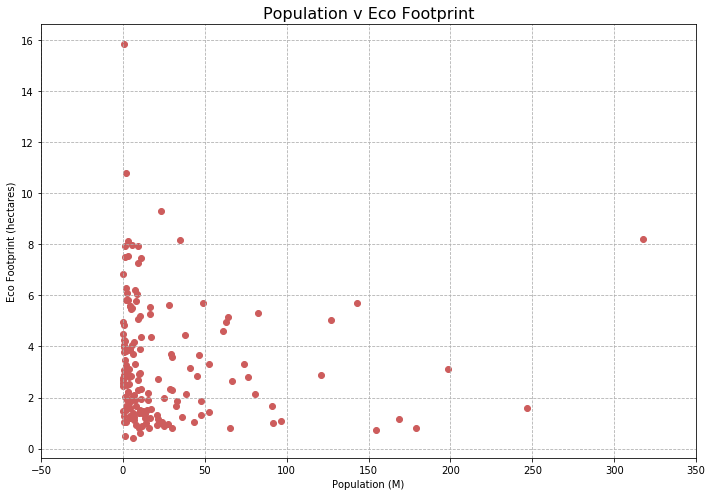


There does not seem to be a define relationship between population and eco footprint.
There is mostly just a cluster of low population countries randomly distributed along the eco footprint axis.

(Two countries with outlier populations (> 350M), China and India, were not included on this graph.
Their eco footprints are 3.38 and 1.16, respectively.)



In [27]:
# Data lists
population = clean_df['Population (millions)']
deficit_reserve = clean_df['Total Ecological Footprint']

# Scatter plot
fig, ax = plt.subplots(figsize=(10,7))
plt.scatter(population, deficit_reserve, color='indianred')
plt.xlim(-50,350,50)
plt.title('Population v Eco Footprint', fontsize=16)
plt.xlabel('Population (M)')
plt.ylabel('Eco Footprint (hectares)')
plt.grid(linestyle='--')

# Save and show the figure
plt.tight_layout()
plt.savefig('Images/1_population_footprint.png')
plt.show()

# Observations
print('''
There does not seem to be a define relationship between population and eco footprint.
There is mostly just a cluster of low population countries randomly distributed along the eco footprint axis.

(Two countries with outlier populations (> 350M), China and India, were not included on this graph.
Their eco footprints are 3.38 and 1.16, respectively.)
''')

## Development of Countries (HDI v GDP) Weighted by Footprint

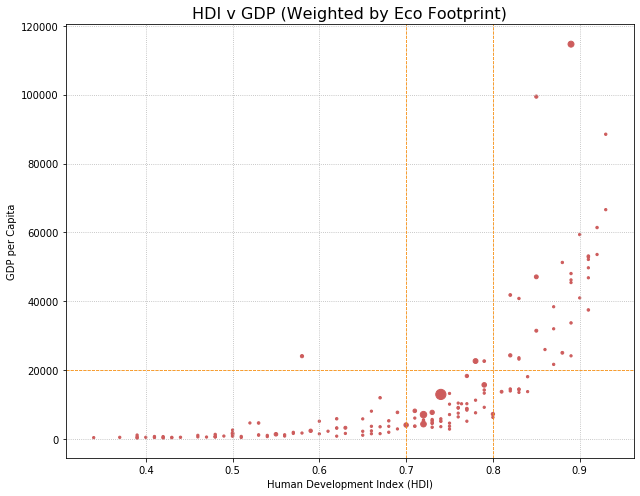

In [4]:
# Data lists
hdi = clean_df['HDI'].tolist()
gdp = clean_df['GDP per Capita'].tolist()
footprint = clean_df['Footprint per Mil Persons'].tolist()
footprint = [dot+5 for dot in footprint]

# Set up axes and labels
fig, ax = plt.subplots(figsize=(9,7))
plt.grid(linestyle='--')
gdp_min = plt.axhline(y=20000, linewidth=0.8, linestyle = '--', color='darkorange')
hdi_max = plt.axvline(x=0.80, linewidth=0.8, linestyle = '--', color='darkorange')
hdi_min = plt.axvline(x=0.70, linewidth=0.8, linestyle = '--', color='darkorange')

# Plot the chart
plt.scatter(hdi, gdp, s=footprint, color='indianred')
plt.xlabel('Human Development Index (HDI)')
plt.ylabel('GDP per Capita')
plt.title('HDI v GDP (Weighted by Eco Footprint)', fontsize=16)

# Save and show the figure
plt.tight_layout()
plt.savefig('Images/2_hdi_footprint.png')
plt.show()


## Regions' HDI v Earths Required

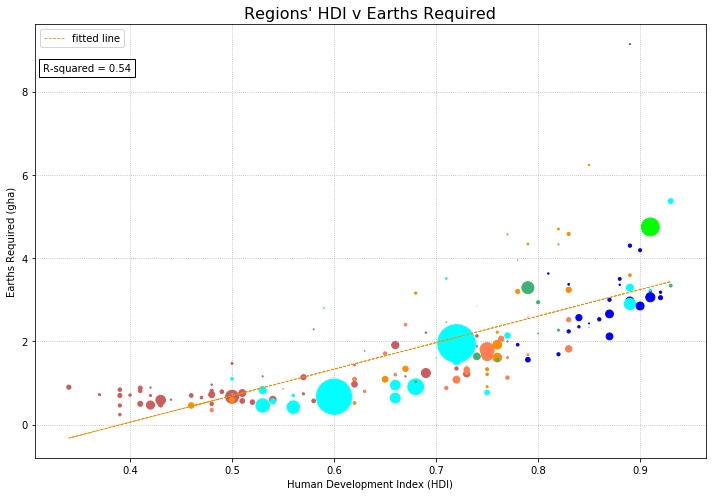

In [46]:
# defining variables
x = clean_df['HDI'].values.tolist()
y = clean_df['Earths Required'].values.tolist()
s = clean_df['Population (millions)'].values.tolist()

# define colors 
def color_attribute(region):
    colors = {
        "Africa": "indianred",
        "Asia-Pacific":"aqua",
        "European Union":"blue",
        "Latin America":'coral',
        "Middle East/Central Asia":'darkorange',
        "North America": "lime",
        "Northern/Eastern Europe": "mediumseagreen"}
    return colors.get(region, 'black')

color_region = []
countries = len(clean_df['Region'])
for country in range(countries):
    color_region.append(color_attribute((clean_df['Region'].tolist())[country]))

# linear regression stats and fitline
slope, intercept, r_value, p_value, _ = stats.linregress(x,y)
fit = intercept + slope*(np.array(x))

# Scatter plot
fig, ax = plt.subplots(figsize = (10,7))
ax.scatter(x, y, s, c = color_region, zorder=2)
plt.plot(x, fit, 'black', label='fitted line', linestyle = '--', linewidth=0.8, color='darkorange')
plt.legend()
plt.grid(linestyle='dotted', zorder=0)
plt.xlabel('Human Development Index (HDI)')
plt.ylabel('Earths Required (gha)')
plt.title("Regions' HDI v Earths Required", fontsize=16)
plt.text(0.315, 8.5, "R-squared = 0.54", bbox=dict(facecolor='white'))

# Save and show the figure
plt.tight_layout()
plt.savefig('Images/3_hdi_earths_scatter.png')
plt.show()



## HDI Groups v Earths Required

In [6]:
# Create bins by HDI group
hdi_bins = [0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
hdi_groups = ["<0.4", "0.41-0.5", "0.51-0.6", "0.61-0.7", "0.71-0.8", "0.81-0.9", ">0.9"]

clean_df["HDI Groups"] = pd.cut(clean_df["HDI"], hdi_bins, labels=hdi_groups)

# calculating mean
grouped_by_hdi = clean_df.groupby("HDI Groups")
hdi_earth_reqd = clean_df.groupby("HDI Groups").mean()['Earths Required']
hdi_earth_reqd = pd.DataFrame(hdi_earth_reqd)

# calculating standard error
hdi_earth_sem = clean_df.groupby("HDI Groups").sem()['Earths Required']
hdi_earth_sem = pd.DataFrame(hdi_earth_sem)

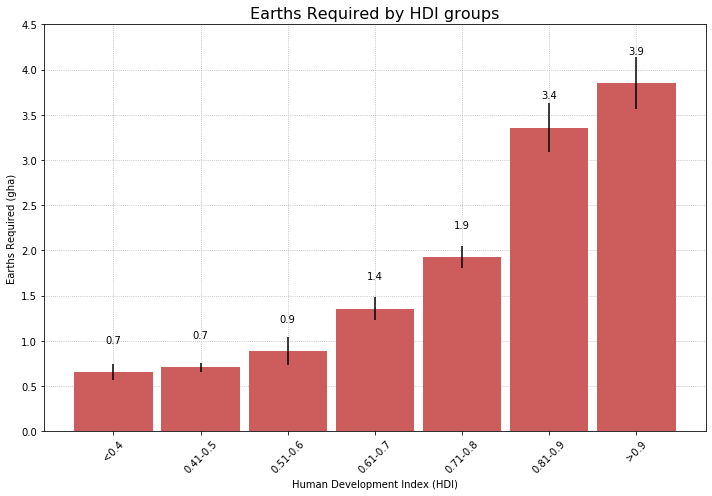

In [31]:
# data lists
earths_reqd = hdi_earth_reqd['Earths Required'].tolist()
sem = hdi_earth_sem['Earths Required'].tolist()

# Bar chart
fig, ax = plt.subplots(figsize = (10,7))
x_axis = np.arange(len(hdi_groups))
ax.set_xticks(x_axis)
ax.set_xticklabels(hdi_groups, rotation = 45)
plt.ylim(0, 4.5)
plt.grid(linestyle='dotted', zorder=0)

plt.xlabel('Human Development Index (HDI)')
plt.ylabel('Earths Required (gha)')
plt.title ('Earths Required by HDI groups', fontsize=16)

rects1 = ax.bar(x_axis, earths_reqd, width = 0.9, color = 'indianred', yerr = sem, zorder=2)

# Label bars
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2, height + 0.3, round(height,1),
        ha = 'center', va = 'bottom', alpha = 2)
autolabel(rects1)

# Save and show the figure
plt.tight_layout()
plt.savefig('Images/4_hdi_earths_bar.png')
plt.show()


## HDI Groups v Bio Reserve / Deficit

In [19]:
# calculating Biocapacity Deficit or Reserve mean
hdi_deficit= clean_df.groupby("HDI Groups").mean()['Biocapacity Deficit or Reserve']
hdi_deficit = pd.DataFrame(hdi_deficit)

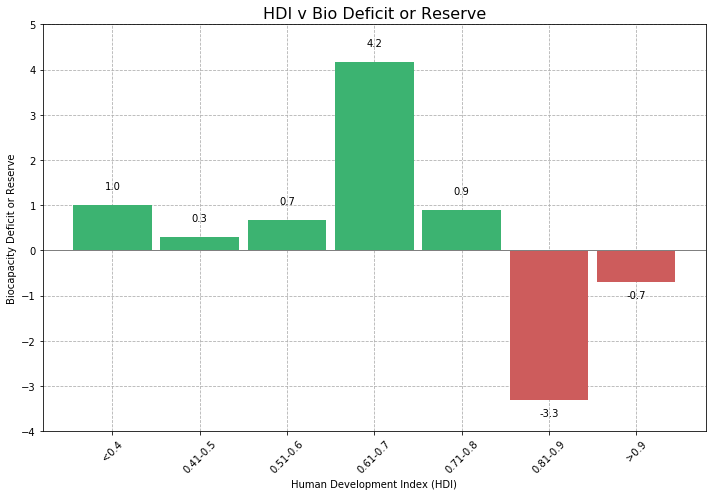

In [40]:
# data lists
deficit_reserve = hdi_deficit['Biocapacity Deficit or Reserve'].tolist()

# set up axes and formatting
fig, ax = plt.subplots(figsize = (10,7))
x_axis = np.arange(len(hdi_groups))
ax.set_xticks (x_axis)
ax.set_xticklabels (hdi_groups, rotation = 45)
plt.axhline(linewidth=1.0, color='grey')
plt.ylim(-4, 5)

plt.xlabel('Human Development Index (HDI)')
plt.ylabel('Biocapacity Deficit or Reserve')
plt.title('HDI v Bio Deficit or Reserve', fontsize=16)
plt.grid(linestyle= '--', zorder=0)

# selecting colors of bars
bar_color = []
for num in deficit_reserve:
    if num <= 0:
        bar_color.append('indianred')
    else:
        bar_color.append('mediumseagreen')

# bar chart
rects2 = ax.bar(x_axis, deficit_reserve, width = 0.9, color =bar_color, zorder=2)

# getting labels on each bar
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        if height >= 0:
            label = height + 0.3
        else:
            label = height - 0.4
        ax.text(rect.get_x() + rect.get_width()/2, label, round(height,1),
        ha = 'center', va = 'bottom', alpha = 2)
autolabel(rects2)

# Save and show the figure
plt.tight_layout()
plt.savefig('Images/5_hdi_reserve.png')
plt.show()


## GDP v Bio Reserve / Deficit

In [20]:
gdp_bins =[-1, 1000, 5000, 15000, 40000, 60000, 100000]
gdp_labels = ["< $1000", "< $5000", "< $15000", "< $40000", "< $60000", "< $100000"]

clean_df["GDP Categories"] = pd.cut(clean_df["GDP per Capita"], gdp_bins, labels=gdp_labels)

# calculating Biocapacity Deficit or Reserve mean
gdp_deficit = clean_df.groupby("GDP Categories").mean()


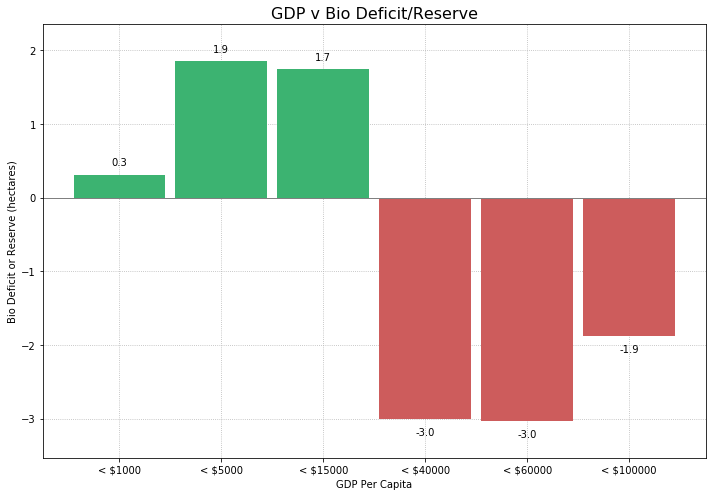

In [51]:
# data list
y_values = gdp_deficit["Biocapacity Deficit or Reserve"].tolist()

# set up axes and formatting
fig, ax = plt.subplots(figsize=(10,7))
x_ticks = np.arange(len(gdp_labels))
ax.set_xticks(x_ticks)
ax.set_xticklabels (gdp_labels)
plt.xlim(-0.75, len(x_ticks)-0.25)
plt.ylim(min(y_values)-.5, max(y_values)+.5)
plt.axhline(linewidth=1.0, color='grey')
plt.grid(linestyle='dotted', zorder=0)

plt.title("GDP v Bio Deficit/Reserve", fontsize=16)
plt.xlabel("GDP Per Capita")
plt.ylabel("Bio Deficit or Reserve (hectares)")

# Color the bars        
bar_color = []
for change in y_values:
    if change <= 0:
        bar_color.append('indianred')
    else:
        bar_color.append('mediumseagreen')

rects3 = ax.bar(x_ticks, y_values, width=0.9, color=bar_color, zorder=2)


# getting labels on each bar
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        if height >= 0:
            label = height + 0.1
        else:
            label = height - 0.25
        ax.text(rect.get_x() + rect.get_width()/2, label, round(height,1),
        ha = 'center', va = 'bottom', alpha = 2)
autolabel(rects3)

# Save and show the figure
plt.tight_layout()
plt.savefig('Images/6_gdp_reserve.png')
plt.show()

## HDI v Footprint (Stacked Bar Composition)

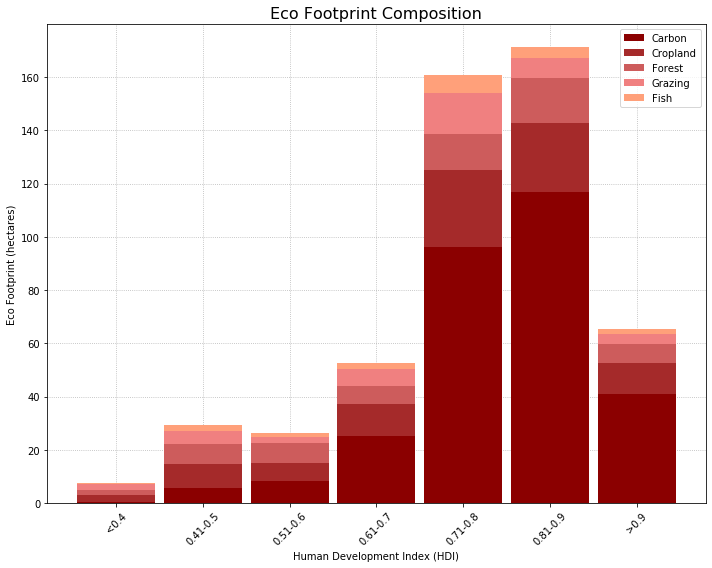

In [12]:
# Data lists
dev_footprint = clean_df.groupby('HDI Groups').sum()

carbon_foot = dev_footprint['Carbon Footprint']
crop_foot = dev_footprint['Cropland Footprint']
forest_foot = dev_footprint['Forest Footprint']
grazing_foot = dev_footprint['Grazing Footprint']
fish_foot = dev_footprint['Fish Footprint']

# Set up axes and labels
fig, ax = plt.subplots(figsize=(10,8))
x_ticks = np.arange(len(hdi_groups))
ax.set_xticks(x_ticks)
ax.set_xticklabels(hdi_groups, rotation=45)
plt.grid(linestyle='dotted', zorder=0)
plt.title('Eco Footprint Composition', fontsize=16)
plt.xlabel('Human Development Index (HDI)')
plt.ylabel('Eco Footprint (hectares)')

# Calculate the bottoms of each stacked bar
crop_bottom = carbon_foot
forest_bottom = np.add(carbon_foot, crop_foot)
grazing_bottom = np.add(forest_bottom, forest_foot)
fish_bottom = np.add(grazing_bottom, grazing_foot)

# Plot the stacked bar chart
carbon_bar = plt.bar(x_ticks, carbon_foot, width=0.9, color='darkred', zorder=2)
crop_bar = plt.bar(x_ticks, crop_foot, width=0.9, bottom=crop_bottom, color='brown', zorder=2)
forest_bar = plt.bar(x_ticks, forest_foot, width=0.9, bottom=forest_bottom, color='indianred', zorder=2)
grazing_bar = plt.bar(x_ticks, grazing_foot, width=0.9, bottom=grazing_bottom, color='lightcoral', zorder=2)
fish_bar = plt.bar(x_ticks, fish_foot, width=0.9, bottom=fish_bottom, color='lightsalmon', zorder=2)

plt.legend((carbon_bar, crop_bar, forest_bar, grazing_bar, fish_bar), ('Carbon', 'Cropland', 'Forest', 'Grazing', 'Fish'))

# Save and show the figure
plt.tight_layout()
plt.savefig('Images/7_hdi_footprint.png')
plt.show()


# Hypothesis Testing

In [13]:
HDI_1 = clean_df.loc[(clean_df['HDI Groups']=='0.41-0.5'), :] ['Total Ecological Footprint']
HDI_2 = clean_df.loc[(clean_df['HDI Groups']=='0.51-0.6'), :] ['Total Ecological Footprint']
HDI_3 = clean_df.loc[(clean_df['HDI Groups']=='0.61-0.7'), :] ['Total Ecological Footprint']
HDI_4 = clean_df.loc[(clean_df['HDI Groups']=='0.71-0.8'), :] ['Total Ecological Footprint']
HDI_5 = clean_df.loc[(clean_df['HDI Groups']=='0.81-0.9'), :] ['Total Ecological Footprint']
HDI_6 = clean_df.loc[(clean_df['HDI Groups']=='>0.9'), : ] ['Total Ecological Footprint']

In [14]:
stats.f_oneway(HDI_1,HDI_2, HDI_3, HDI_4, HDI_5, HDI_6)

F_onewayResult(statistic=39.2815847451729, pvalue=1.351517011032018e-25)

## There was significant difference in the Total Eco Footprint among HDI groups with p-value 6.89e-28

In [15]:
HDI_1 = clean_df.loc[(clean_df['HDI Groups']=='0.41-0.5'), :] ['Biocapacity Deficit or Reserve']
HDI_2 = clean_df.loc[(clean_df['HDI Groups'] =='0.51-0.6'), :] ['Biocapacity Deficit or Reserve']
HDI_3 = clean_df.loc[(clean_df['HDI Groups']=='0.61-0.7'), :] ['Biocapacity Deficit or Reserve']
HDI_4 = clean_df.loc[(clean_df['HDI Groups']=='0.71-0.8'), :] ['Biocapacity Deficit or Reserve']
HDI_5 = clean_df.loc[(clean_df['HDI Groups']=='0.81-0.9'), :] ['Biocapacity Deficit or Reserve']
HDI_6 = clean_df.loc[(clean_df['HDI Groups'] =='>0.9'), : ] ['Biocapacity Deficit or Reserve']

In [16]:
stats.f_oneway(HDI_1,HDI_2, HDI_3, HDI_4, HDI_5, HDI_6)

F_onewayResult(statistic=1.764618206966036, pvalue=0.12354005462653893)

## Oneway ANOVA comparison shows that there is no significant difference in the Biocapacity Deficit/Reserve among HDI-groups with p-value 0.204